<a href="https://colab.research.google.com/github/sjeong722/Template/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4%20%EA%B3%A0%EA%B0%9D%20%EC%84%B8%EB%B6%84%ED%99%94%20RFM%2C%20Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이커머스 고객 세분화
Data
- https://dacon.io/competitions/official/236222/overview/description

Reference
- https://dacon.io/competitions/official/236222/codeshare/9806
- https://dacon.io/competitions/official/236222/codeshare/9808
- https://dacon.io/competitions/official/236222/codeshare/9812
- https://github.com/sohyunwriter/data-cookbook/RFM분석.ipynb


In [150]:
from google.colab import drive
drive.mount('/content/drive') # 드라이브에 연결

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1-1. 데이터 불러오기

In [153]:
import pandas as pd

In [154]:
df_cus = pd.read_csv('/content/drive/MyDrive/DACON_이커머스고객세분화/open/Customer_info.csv')

In [155]:
df_dis = pd.read_csv('/content/drive/MyDrive/DACON_이커머스고객세분화/open/Discount_info.csv')

In [156]:
df_mar = pd.read_csv('/content/drive/MyDrive/DACON_이커머스고객세분화/open/Marketing_info.csv')

In [157]:
df_onl = pd.read_csv('/content/drive/MyDrive/DACON_이커머스고객세분화/open/Onlinesales_info.csv')

In [158]:
df_tax = pd.read_csv('/content/drive/MyDrive/DACON_이커머스고객세분화/open/Tax_info.csv')

##1-2. 컬럼 정보 확인

- Customer_info.csv [파일]   
고객ID : 고객 고유 ID  
성별 : 고객 성별  
고객지역 : 고객지역  
가입기간 : 가입기간 (단위 : 월)  

- Discount_info.csv [파일]  
할인과 관련된 정보  
월 : 월(Month) 정보  
제품카테고리 : 제품이 포함된 카테고리  
쿠폰코드 : 쿠폰코드  
할인율 : 해당 쿠폰에 대한 할인율(%)  


- Marketing_info.csv [파일]  
마케팅비용과 관련된 정보  
날짜 : 마케팅이 이루어진 날짜  
오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러)  
온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러)  


- Onlinesales_info.csv [파일]  
온라인거래와 관련된 정보  
고객ID : 고객 고유 ID  
거래ID : 거래 고유 ID  
거래날짜 : 거래가 이루어진 날짜  
제품ID : 제품 고유 ID  
제품카테고리 : 제품이 포함된 카테고리  
수량 : 주문한 품목 수  
평균금액 : 수량 1개당 가격 (단위 : 달러)  
동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음  
배송료 : 배송비용 (단위 : 달러)  
쿠폰상태 : 할인쿠폰 적용 상태  


- Tax_info.csv [파일]  
세금과 관련된 정보  
제품 카테고리 : 제품이 포함된 카테고리  
GST : Goods and Services Tax(%)  


customer

In [159]:
df_cus.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [160]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


discount

In [161]:
df_dis.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [162]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


marketing

In [163]:
df_mar.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [164]:
df_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


onlinesales

In [165]:
df_onl.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [166]:
df_onl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


tax

In [167]:
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [168]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


## 1-3. 전처리
- 데이터 타입 변환  
- 데이터셋을 하나의 df로 통합
- 결측치 처리

데이터 타입 변환

In [169]:
# discount파일 '월' 컬럼 object -> int 변환
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun':6, 'Jul':7, 'Aug':8,
    'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12
}

df_dis['월'] = df_dis['월'].map(month_map)

In [170]:
# marketing파일 '날짜' 컬럼 object -> datetime 변환
df_mar['날짜'] = pd.to_datetime(df_mar['날짜'])

In [171]:
# onlinesales파일 '거래날짜' 컬럼 object -> datetime 변환
df_onl['거래날짜'] = pd.to_datetime(df_onl['거래날짜'])

데이터셋 통합


[merge] olinesales + customer (PK: 고객ID) = df



In [172]:
# customer 파일 고객ID 중복있는지 확인방법.
# df_cus 첫번째 인덱스(행 갯수)와 고객ID 컬럼 항목 갯수 확인. 일치하므로 중복없음.
df_cus.shape[0], len(df_cus['고객ID'].unique())

(1468, 1468)

In [173]:
df = pd.merge(df_onl, df_cus, on = '고객ID', how = 'left')
# 주의할 점: onlinesales 거래목록 기준 customer 정보가 추가되야하기 때문에 df_onl (먼저 = left에 = 기준) 작성한다.

In [174]:
df.shape  # merge 후 건수 늘어나지 않았음 확인

(52924, 12)

[merge] df + discount (PK: 월, 제품 카테고리)  

In [175]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    int64 
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.5+ KB


In [176]:
df_dis.head()

,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,10
1,2,Apparel,SALE20,20
2,3,Apparel,SALE30,30
3,1,Nest-USA,ELEC10,10
4,2,Nest-USA,ELEC20,20


In [177]:
df_dis.shape

(204, 4)

In [178]:
# 먼저 df_dis에서 월과 제품카테고리 컬럼 그룹으로 묶기
group = df_dis.groupby(['월','제품카테고리']).count()
group = group.reset_index()

In [179]:
group['쿠폰코드'].max()

1

In [180]:
# df에는 없는 월 컬럼 생성하기
df['월'] = pd.to_datetime(df['거래날짜']).dt.month

In [181]:
# df , df_dis 병합
# 월별, 카테고리별 할인율이 상이하므로 PK를 월과 제품카테고리 같이 잡아야함.
df = pd.merge(df, df_dis, on = ['월', '제품카테고리'], how = 'left')

In [182]:
df.shape # 전체 행 갯수 변화없음 확인.

(52924, 15)

In [183]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0


[merge] df + tax (PK: 제품카테고리)

In [184]:
df = pd.merge(df, df_tax, on = '제품카테고리', how = 'left')

데이터 프레임 생성 완료

In [185]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0,0.18


결측치 처리

In [186]:
df.isnull().sum()

,0
고객ID,0
거래ID,0
거래날짜,0
제품ID,0
제품카테고리,0
수량,0
평균금액,0
배송료,0
쿠폰상태,0
성별,0


In [187]:
# 쿠폰코드 결측치 'unknown' 으로 대체
df['쿠폰코드'].fillna('nunknown', inplace = True)

# 할인율 결측치 0 으로 대체
df['할인율'].fillna(0, inplace = True)

/tmp/ipython-input-3456215132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['쿠폰코드'].fillna('nunknown', inplace = True)
/tmp/ipython-input-3456215132.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

2-1. 데이터 집계

In [188]:
df.describe() # 숫자 데이터 max 값이 크게 튐.

,거래날짜,수량,평균금액,배송료,가입기간,월,할인율,GST
count,52924,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630,26.127995,6.652388,19.802358,0.137462
min,2019-01-01 00:00:00,1.000000,0.390000,0.000000,2.000000,1.000000,0.000000,0.050000
25%,2019-04-12 00:00:00,1.000000,5.700000,6.000000,15.000000,4.000000,10.000000,0.100000
50%,2019-07-13 00:00:00,1.000000,16.990000,6.000000,27.000000,7.000000,20.000000,0.180000
75%,2019-09-27 00:00:00,2.000000,102.130000,6.500000,37.000000,9.000000,30.000000,0.180000
max,2019-12-31 00:00:00,900.000000,355.740000,521.360000,50.000000,12.000000,30.000000,0.180000
std,NaN,20.104711,64.006882,19.475613,13.478285,3.333364,8.278878,0.045825


In [189]:
# 제품카테고리별 구매금액의 분포 통계 요약
df_group = (
    df.groupby('제품카테고리')['평균금액']
      .agg(
          count='count',               # 표본 개수
          mean='mean',                 # 평균
          median='median',             # 중앙값
          std='std',                   # 표준편차
          q25=lambda x: x.quantile(0.25),  # 1사분위수
          q75=lambda x: x.quantile(0.75),  # 3사분위수
          min='min',                   # 최소값
          max='max'                    # 최대값
      )
      .reset_index()
)

# .agg() 함수 사용법
# df.groupby('기준컬럼').agg({'집계할컬럼': '함수명'})

# 예) 카테고리별 평균금액의 집계 함수
# df.groupby('제품카테고리')['평균금액'].agg(['mean', 'median', 'std'])

# 결과 확인
print(df_group.head())

        제품카테고리  count       mean  median        std    q25      q75    min  \
0  Accessories    234   8.211068    3.99  11.873000   2.44   5.0900   2.39   
1      Android     43  15.903488   15.99   3.256759  13.99  19.9900  11.19   
2      Apparel  18126  19.788995   15.39  15.413707  10.63  20.7475   1.59   
3    Backpacks     89  80.046404   79.99  21.971993  79.99  99.9900  38.39   
4         Bags   1882  29.830797   12.31  35.339709   4.99  55.9900   0.99   

      max  
0   59.99  
1   20.62  
2  149.00  
3  103.15  
4  152.88  


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   거래ID    52924 non-null  object        
 2   거래날짜    52924 non-null  datetime64[ns]
 3   제품ID    52924 non-null  object        
 4   제품카테고리  52924 non-null  object        
 5   수량      52924 non-null  int64         
 6   평균금액    52924 non-null  float64       
 7   배송료     52924 non-null  float64       
 8   쿠폰상태    52924 non-null  object        
 9   성별      52924 non-null  object        
 10  고객지역    52924 non-null  object        
 11  가입기간    52924 non-null  int64         
 12  월       52924 non-null  int32         
 13  쿠폰코드    52924 non-null  object        
 14  할인율     52924 non-null  float64       
 15  GST     52924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(8)
memory usage: 6.3+ MB


2-2. 파생변수 생성  
- 전체금액 = 수량 * 평균금액
- 전체금액_vat포함 = (수량 * 평균금액) * (1 + tax)
- 지불금액 = (수량 * 평균금액) * (1- 할인율*쿠폰사용여부 / 100) * (1 + tax)

In [191]:
df['쿠폰상태'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [192]:
df['쿠폰사용여부'] = df['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)

In [193]:
df['전체금액'] = (df['수량'] * df['평균금액'])
df['전체금액_vat포함'] = (df['수량'] * df['평균금액']) * (1 + df['GST'])
df['지불금액'] = (df['수량'] * df['평균금액']) * (1 + df['GST']) * (1 - (df['할인율'] * df['쿠폰사용여부'] / 100))

In [194]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율,GST,쿠폰사용여부,전체금액,전체금액_vat포함,지불금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10,1,153.71,169.081,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,1,ELEC10,10.0,0.10,1,153.71,169.081,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,1,OFF10,10.0,0.10,1,2.05,2.255,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,1,SALE10,10.0,0.18,0,87.65,103.427,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,1,AIO10,10.0,0.18,1,16.50,19.470,17.5230


In [195]:
print("일간 활성 고객 수 (DAU)")
print(dau.head())

print("\n월간 활성 고객 수 (MAU)")
print(mau.head())

일간 활성 고객 수 (DAU)
          일자  DAU
0 2019-01-01    7
1 2019-01-02   10
2 2019-01-03   14
3 2019-01-04    6
4 2019-01-05    9

월간 활성 고객 수 (MAU)
         월  MAU
0  2019-01  215
1  2019-02  109
2  2019-03  208
3  2019-04  224
4  2019-05  200


2-3. EDA

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 분석대상
col = '평균금액'
data = df[col]

In [200]:
# IQR 계산 (이상치 경계)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수 확인
outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()
print(f"{col} 이상치 개수: {outlier_count}개")

평균금액 이상치 개수: 728개


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


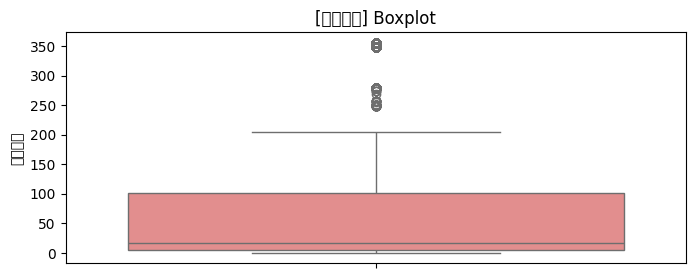

In [211]:
# Boxplot
plt.figure(figsize=(8,3))
sns.boxplot(y=data, color='lightcoral')
plt.title(f"[{col}] Boxplot")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

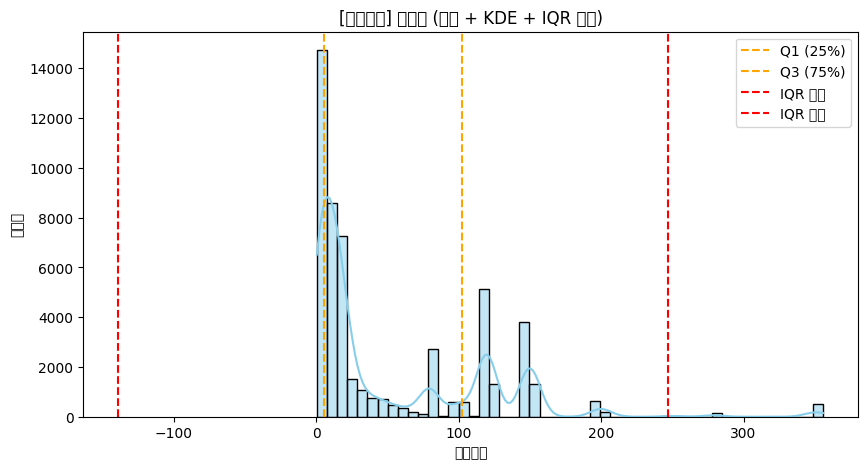

In [202]:
# 정규분포 + KDE 커널곡선
plt.figure(figsize=(10,5))
sns.histplot(data, bins=50, kde=True, color='skyblue')
plt.axvline(Q1, color='orange', linestyle='--', label='Q1 (25%)')
plt.axvline(Q3, color='orange', linestyle='--', label='Q3 (75%)')
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR 하한')
plt.axvline(upper_bound, color='red', linestyle='--', label='IQR 상한')
plt.title(f"[{col}] 분포도 (정규 + KDE + IQR 경계)")
plt.xlabel(col)
plt.ylabel("빈도수")
plt.legend()
plt.show()